<a href="https://colab.research.google.com/github/ViniciusPrincipe/BitcoinPrediction-LSTM/blob/main/BtcLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import io
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM,Dropout
from keras.callbacks import EarlyStopping
import sklearn.metrics as sk
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('/content/btc.csv')

dfLimpo = df['Close'].values
dfLimpo = dfLimpo[::-1]

In [3]:
len(dfLimpo)

1273

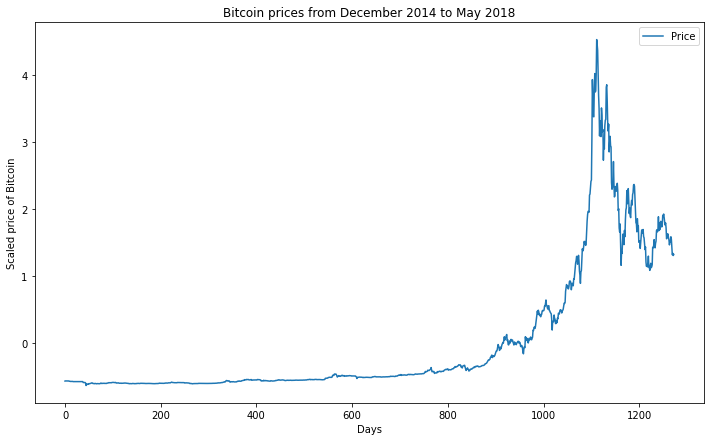

In [4]:
#data preprocessing(scaling)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dfLimpo.reshape(-1, 1))
#plotting the data
import matplotlib.pyplot as plt
plt.figure(figsize=(12,7), frameon=False, facecolor='brown', edgecolor='blue')
plt.title('Bitcoin prices from December 2014 to May 2018')
plt.xlabel('Days')
plt.ylabel('Scaled price of Bitcoin')
plt.plot(scaled_data, label='Price')
plt.legend()
plt.show()

In [5]:
def window_data(data, window_size):
    X = []
    y = []
    
    i = 0
    while (i + window_size) <= len(data) - 1:
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
        
        i += 1
    assert len(X) ==  len(y)
    return X, y

In [6]:
def model_evaluation(model,x_test,y_test):
  y_pred = model.predict(x_test)
  
  mse = sk.mean_squared_error(y_test, y_pred)
  rmse = np.sqrt(mse)
  mae = sk.mean_absolute_error(y_test, y_pred)
  r2 = sk.r2_score(y_test, y_pred)

  y_testNorm = scaler.inverse_transform(y_test)
  y_predNorm = scaler.inverse_transform(y_pred)

  # Print the evaluation metrics
  print("Mean squared error: ", mse)
  print("Root mean squared error: ", rmse)
  print("Mean absolute error: ", mae)
  print("R2 score: ", r2)

  # Plot the predictions and actual values
  plt.plot(y_testNorm, label='Actual')
  plt.plot(y_predNorm, label='Predicted')
  plt.xlabel('Time')
  plt.ylabel('Closing Price')
  plt.legend()
  plt.show()

In [7]:
def plot_history(history):
  # Plot training & validation loss values
  plt.plot(history.history['loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train'], loc='upper right')
  plt.show()

In [8]:
#Configuração para todos treinamentos
early_stop_train = EarlyStopping(monitor = 'loss',patience = 5)

# Modelo 1, window_size = 7

In [9]:
#Criando datasets usando uma janela com 7 pontos
window_size = 7
x, y = window_data(scaled_data, window_size)
x_train, x_test = np.array(x[:1018]),np.array(x[1018:])
y_train, y_test = np.array(y[:1018]), np.array(y[1018:])

print("X_train size: {}".format(x_train.shape))
print("y_train size: {}".format(y_train.shape))
print("X_test size: {}".format(x_test.shape))
print("y_test size: {}".format(y_test.shape))

X_train size: (1018, 7, 1)
y_train size: (1018, 1)
X_test size: (248, 7, 1)
y_test size: (248, 1)


Epoch 1/250
128/128 [==============================] - 5s 8ms/step - loss: 0.0184
Epoch 2/250
128/128 [==============================] - 1s 9ms/step - loss: 7.0468e-04
Epoch 3/250
128/128 [==============================] - 1s 8ms/step - loss: 7.0952e-04
Epoch 4/250
128/128 [==============================] - 1s 9ms/step - loss: 6.8893e-04
Epoch 5/250
128/128 [==============================] - 1s 8ms/step - loss: 6.6967e-04
Epoch 6/250
128/128 [==============================] - 1s 8ms/step - loss: 6.6066e-04
Epoch 7/250
128/128 [==============================] - 2s 13ms/step - loss: 6.5373e-04
Epoch 8/250
128/128 [==============================] - 2s 12ms/step - loss: 6.5354e-04
Epoch 9/250
128/128 [==============================] - 1s 10ms/step - loss: 6.6204e-04
Epoch 10/250
128/128 [==============================] - 1s 10ms/step - loss: 6.4749e-04
Epoch 11/250
128/128 [==============================] - 1s 10ms/step - loss: 6.2745e-04
Epoch 12/250
128/128 [=============================

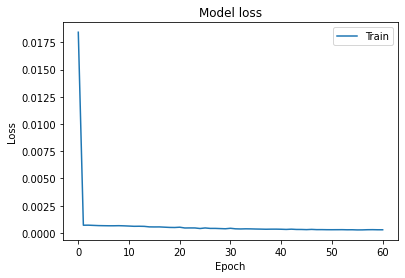

8/8 [==============================] - 0s 3ms/step
Mean squared error:  0.0681270698930961
Root mean squared error:  0.2610116278886749
Mean absolute error:  0.1744487603350946
R2 score:  0.916350977261969


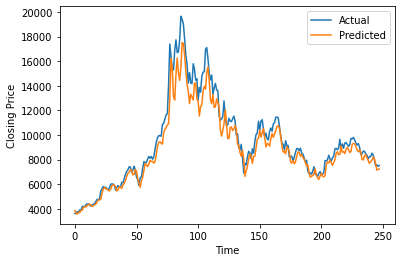

In [10]:
model = Sequential()
model.add(LSTM(50, input_shape=(window_size, 1)))
model.add(Dense(1))
optimizer = keras.optimizers.Adam()
model.compile(loss='mean_squared_error', optimizer= optimizer)

history = model.fit(x_train, y_train, epochs=250, batch_size=8,callbacks=[early_stop_train])
plot_history(history)
model_evaluation(model,x_test,y_test)

Epoch 1/250
128/128 [==============================] - 4s 5ms/step - loss: 0.1132
Epoch 2/250
128/128 [==============================] - 1s 5ms/step - loss: 0.0198
Epoch 3/250
128/128 [==============================] - 1s 6ms/step - loss: 0.0091
Epoch 4/250
128/128 [==============================] - 1s 6ms/step - loss: 0.0061
Epoch 5/250
128/128 [==============================] - 1s 5ms/step - loss: 0.0049
Epoch 6/250
128/128 [==============================] - 1s 5ms/step - loss: 0.0046
Epoch 7/250
128/128 [==============================] - 1s 5ms/step - loss: 0.0042
Epoch 8/250
128/128 [==============================] - 1s 6ms/step - loss: 0.0042
Epoch 9/250
128/128 [==============================] - 1s 5ms/step - loss: 0.0036
Epoch 10/250
128/128 [==============================] - 1s 5ms/step - loss: 0.0037
Epoch 11/250
128/128 [==============================] - 1s 5ms/step - loss: 0.0034
Epoch 12/250
128/128 [==============================] - 1s 5ms/step - loss: 0.0035
Epoch 13/250


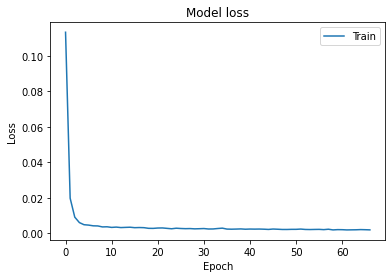

8/8 [==============================] - 0s 3ms/step
Mean squared error:  0.4849251735287457
Root mean squared error:  0.6963656895114417
Mean absolute error:  0.5072911427368145
R2 score:  0.40459032025887354


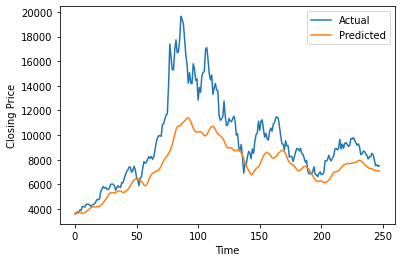

In [11]:
#modelo com Regularização
model = Sequential()
model.add(LSTM(50, input_shape=(window_size, 1),kernel_regularizer= keras.regularizers.l1(0.01)))
model.add(Dense(1))
optimizer = keras.optimizers.Adam()
model.compile(loss='mean_squared_error', optimizer= optimizer)

history = model.fit(x_train, y_train, epochs=250, batch_size=8,callbacks=[early_stop_train])
plot_history(history)
model_evaluation(model,x_test,y_test)


Epoch 1/250
128/128 [==============================] - 4s 8ms/step - loss: 0.0208
Epoch 2/250
128/128 [==============================] - 1s 5ms/step - loss: 0.0019
Epoch 3/250
128/128 [==============================] - 1s 5ms/step - loss: 0.0017
Epoch 4/250
128/128 [==============================] - 1s 5ms/step - loss: 0.0017
Epoch 5/250
128/128 [==============================] - 1s 6ms/step - loss: 0.0016
Epoch 6/250
128/128 [==============================] - 1s 6ms/step - loss: 0.0016
Epoch 7/250
128/128 [==============================] - 1s 6ms/step - loss: 0.0015
Epoch 8/250
128/128 [==============================] - 1s 6ms/step - loss: 0.0013
Epoch 9/250
128/128 [==============================] - 1s 5ms/step - loss: 0.0013
Epoch 10/250
128/128 [==============================] - 1s 5ms/step - loss: 0.0014
Epoch 11/250
128/128 [==============================] - 1s 5ms/step - loss: 0.0012
Epoch 12/250
128/128 [==============================] - 1s 5ms/step - loss: 0.0013
Epoch 13/250


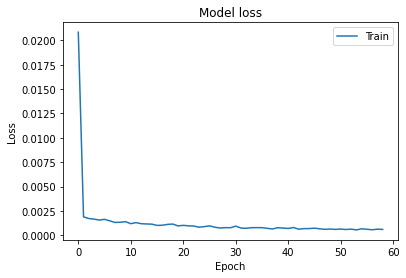

8/8 [==============================] - 0s 3ms/step
Mean squared error:  0.04846504836698091
Root mean squared error:  0.2201477875586782
Mean absolute error:  0.15794452807239784
R2 score:  0.9404927594976429


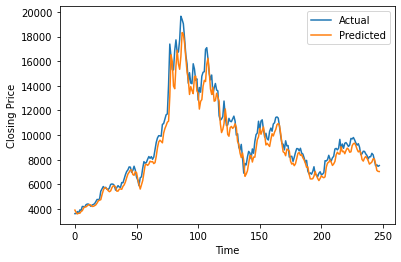

In [12]:
#modelo com dropout
model = Sequential()
model.add(LSTM(50, input_shape=(window_size, 1)))
model.add(Dropout(0.1))
model.add(Dense(1))
optimizer = keras.optimizers.Adam()
model.compile(loss='mean_squared_error', optimizer= optimizer)

history = model.fit(x_train, y_train, epochs=250, batch_size=8,callbacks=[early_stop_train])
plot_history(history)
model_evaluation(model,x_test,y_test)

Epoch 1/250
128/128 [==============================] - 3s 5ms/step - loss: 0.1141
Epoch 2/250
128/128 [==============================] - 1s 6ms/step - loss: 0.0242
Epoch 3/250
128/128 [==============================] - 1s 7ms/step - loss: 0.0111
Epoch 4/250
128/128 [==============================] - 1s 7ms/step - loss: 0.0071
Epoch 5/250
128/128 [==============================] - 1s 7ms/step - loss: 0.0057
Epoch 6/250
128/128 [==============================] - 1s 5ms/step - loss: 0.0051
Epoch 7/250
128/128 [==============================] - 1s 10ms/step - loss: 0.0050
Epoch 8/250
128/128 [==============================] - 1s 8ms/step - loss: 0.0047
Epoch 9/250
128/128 [==============================] - 1s 7ms/step - loss: 0.0048
Epoch 10/250
128/128 [==============================] - 1s 6ms/step - loss: 0.0048
Epoch 11/250
128/128 [==============================] - 1s 5ms/step - loss: 0.0042
Epoch 12/250
128/128 [==============================] - 1s 6ms/step - loss: 0.0042
Epoch 13/250

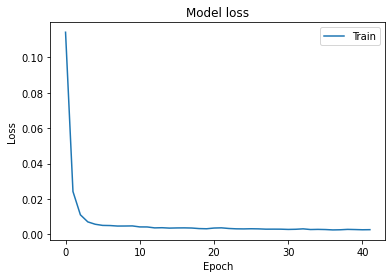

8/8 [==============================] - 1s 4ms/step
Mean squared error:  0.35755561527796026
Root mean squared error:  0.5979595431782657
Mean absolute error:  0.40147178885117507
R2 score:  0.5609795366301564


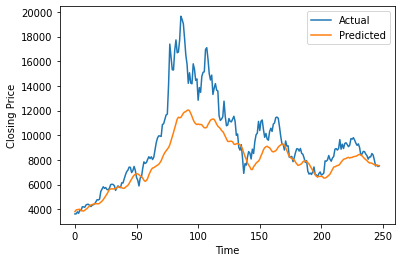

In [13]:
#modelo com dropout e regularização

model = Sequential()
model.add(LSTM(50, input_shape=(window_size, 1),kernel_regularizer= keras.regularizers.l1(0.01)))
model.add(Dropout(0.1))
model.add(Dense(1))
optimizer = keras.optimizers.Adam()
model.compile(loss='mean_squared_error', optimizer= optimizer)

history = model.fit(x_train, y_train, epochs=250, batch_size=8,callbacks=[early_stop_train])
plot_history(history)
model_evaluation(model,x_test,y_test)

para o modelo com 50 neuronios na camada oculta e window_size = 7 foi melhor usar somente early stop com o dropout. Com regularização l1 o modelo apresentou uma grande piora na performance

# Modelo 1, window_size = 5

In [14]:
window_size = 5
x, y = window_data(scaled_data, window_size)
x_train, x_test = np.array(x[:1018]),np.array(x[1018:])
y_train, y_test = np.array(y[:1018]), np.array(y[1018:])

print("X_train size: {}".format(x_train.shape))
print("y_train size: {}".format(y_train.shape))
print("X_test size: {}".format(x_test.shape))
print("y_test size: {}".format(y_test.shape))

X_train size: (1018, 5, 1)
y_train size: (1018, 1)
X_test size: (250, 5, 1)
y_test size: (250, 1)


Epoch 1/250
128/128 [==============================] - 3s 4ms/step - loss: 0.0159
Epoch 2/250
128/128 [==============================] - 1s 5ms/step - loss: 5.7919e-04
Epoch 3/250
128/128 [==============================] - 1s 5ms/step - loss: 5.6161e-04
Epoch 4/250
128/128 [==============================] - 1s 5ms/step - loss: 5.3494e-04
Epoch 5/250
128/128 [==============================] - 1s 4ms/step - loss: 5.3575e-04
Epoch 6/250
128/128 [==============================] - 1s 5ms/step - loss: 5.4890e-04
Epoch 7/250
128/128 [==============================] - 1s 5ms/step - loss: 5.4317e-04
Epoch 8/250
128/128 [==============================] - 1s 4ms/step - loss: 5.4666e-04
Epoch 9/250
128/128 [==============================] - 1s 4ms/step - loss: 5.3215e-04
Epoch 10/250
128/128 [==============================] - 1s 5ms/step - loss: 5.2796e-04
Epoch 11/250
128/128 [==============================] - 1s 5ms/step - loss: 5.2454e-04
Epoch 12/250
128/128 [==============================] - 

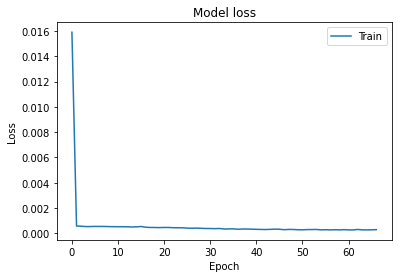

8/8 [==============================] - 1s 3ms/step
Mean squared error:  0.15711133037242012
Root mean squared error:  0.3963727164833878
Mean absolute error:  0.2945521057403874
R2 score:  0.8094338787673802


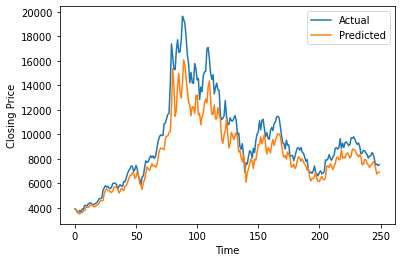

In [15]:
model = Sequential()
model.add(LSTM(50, input_shape=(window_size, 1)))
model.add(Dense(1))
optimizer = keras.optimizers.Adam()
model.compile(loss='mean_squared_error', optimizer= optimizer)

history = model.fit(x_train, y_train, epochs=250, batch_size=8,callbacks=[early_stop_train])
plot_history(history)
model_evaluation(model,x_test,y_test)

Epoch 1/250
128/128 [==============================] - 3s 5ms/step - loss: 0.0262
Epoch 2/250
128/128 [==============================] - 1s 6ms/step - loss: 0.0017
Epoch 3/250
128/128 [==============================] - 1s 7ms/step - loss: 0.0016
Epoch 4/250
128/128 [==============================] - 1s 6ms/step - loss: 0.0016
Epoch 5/250
128/128 [==============================] - 1s 7ms/step - loss: 0.0015
Epoch 6/250
128/128 [==============================] - 1s 5ms/step - loss: 0.0013
Epoch 7/250
128/128 [==============================] - 1s 5ms/step - loss: 0.0013
Epoch 8/250
128/128 [==============================] - 1s 5ms/step - loss: 0.0013
Epoch 9/250
128/128 [==============================] - 1s 5ms/step - loss: 0.0012
Epoch 10/250
128/128 [==============================] - 1s 5ms/step - loss: 0.0012
Epoch 11/250
128/128 [==============================] - 1s 5ms/step - loss: 0.0011
Epoch 12/250
128/128 [==============================] - 1s 5ms/step - loss: 0.0012
Epoch 13/250


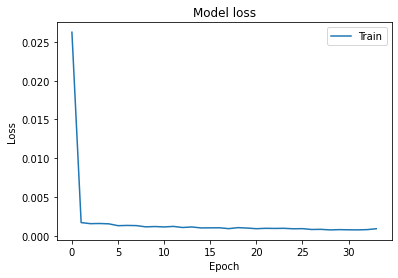

8/8 [==============================] - 0s 3ms/step
Mean squared error:  0.3271326635350947
Root mean squared error:  0.571955123707354
Mean absolute error:  0.4490769837972158
R2 score:  0.603208739493163


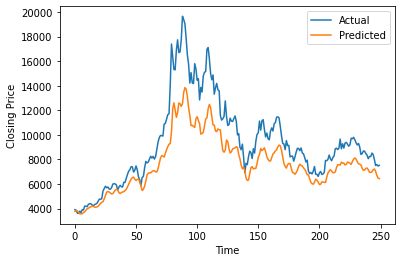

In [16]:
#modelo com dropout
model = Sequential()
model.add(LSTM(50, input_shape=(window_size, 1)))
model.add(Dropout(0.1))
model.add(Dense(1))
optimizer = keras.optimizers.Adam()
model.compile(loss='mean_squared_error', optimizer= optimizer)

history = model.fit(x_train, y_train, epochs=250, batch_size=8,callbacks=[early_stop_train])
plot_history(history)
model_evaluation(model,x_test,y_test)

Epoch 1/250
128/128 [==============================] - 3s 5ms/step - loss: 0.1362
Epoch 2/250
128/128 [==============================] - 1s 5ms/step - loss: 0.0264
Epoch 3/250
128/128 [==============================] - 1s 5ms/step - loss: 0.0133
Epoch 4/250
128/128 [==============================] - 1s 4ms/step - loss: 0.0079
Epoch 5/250
128/128 [==============================] - 1s 5ms/step - loss: 0.0057
Epoch 6/250
128/128 [==============================] - 1s 4ms/step - loss: 0.0045
Epoch 7/250
128/128 [==============================] - 1s 5ms/step - loss: 0.0041
Epoch 8/250
128/128 [==============================] - 1s 5ms/step - loss: 0.0035
Epoch 9/250
128/128 [==============================] - 1s 5ms/step - loss: 0.0034
Epoch 10/250
128/128 [==============================] - 1s 5ms/step - loss: 0.0034
Epoch 11/250
128/128 [==============================] - 1s 7ms/step - loss: 0.0033
Epoch 12/250
128/128 [==============================] - 1s 6ms/step - loss: 0.0028
Epoch 13/250


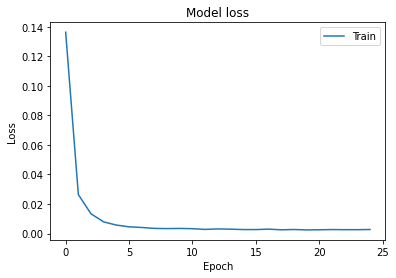

8/8 [==============================] - 0s 3ms/step
Mean squared error:  0.48804732487363706
Root mean squared error:  0.6986038397215099
Mean absolute error:  0.5079073290087667
R2 score:  0.4080294180014672


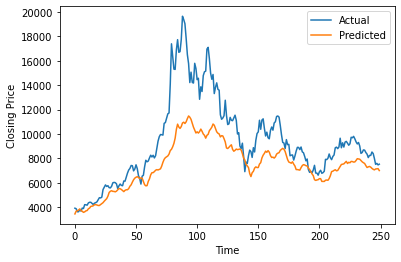

In [17]:
#modelo com regularização
model = Sequential()
model.add(LSTM(50, input_shape=(window_size, 1),kernel_regularizer= keras.regularizers.l1(0.01)))
model.add(Dense(1))
optimizer = keras.optimizers.Adam()
model.compile(loss='mean_squared_error', optimizer= optimizer)

history = model.fit(x_train, y_train, epochs=250, batch_size=8,callbacks=[early_stop_train])
plot_history(history)
model_evaluation(model,x_test,y_test)

Epoch 1/250
128/128 [==============================] - 3s 5ms/step - loss: 0.1221
Epoch 2/250
128/128 [==============================] - 1s 5ms/step - loss: 0.0244
Epoch 3/250
128/128 [==============================] - 1s 5ms/step - loss: 0.0122
Epoch 4/250
128/128 [==============================] - 1s 5ms/step - loss: 0.0089
Epoch 5/250
128/128 [==============================] - 1s 5ms/step - loss: 0.0074
Epoch 6/250
128/128 [==============================] - 1s 5ms/step - loss: 0.0062
Epoch 7/250
128/128 [==============================] - 1s 5ms/step - loss: 0.0053
Epoch 8/250
128/128 [==============================] - 1s 5ms/step - loss: 0.0052
Epoch 9/250
128/128 [==============================] - 1s 5ms/step - loss: 0.0052
Epoch 10/250
128/128 [==============================] - 1s 5ms/step - loss: 0.0050
Epoch 11/250
128/128 [==============================] - 1s 4ms/step - loss: 0.0042
Epoch 12/250
128/128 [==============================] - 1s 6ms/step - loss: 0.0044
Epoch 13/250


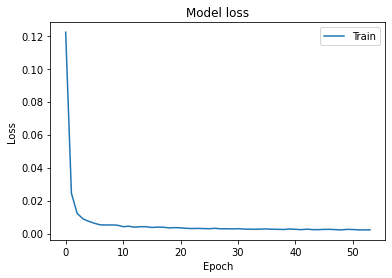

8/8 [==============================] - 0s 3ms/step
Mean squared error:  0.31044646108908047
Root mean squared error:  0.5571772259246428
Mean absolute error:  0.3722291376491196
R2 score:  0.6234480492278693


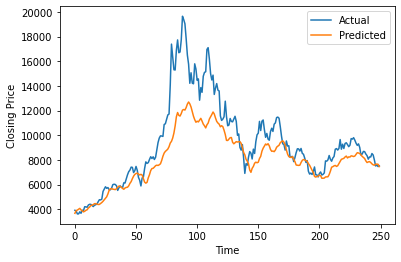

In [18]:
#modelo com dropout e regularização
model = Sequential()
model.add(LSTM(50, input_shape=(window_size, 1),kernel_regularizer= keras.regularizers.l1(0.01)))
model.add(Dropout(0.1))
model.add(Dense(1))
optimizer = keras.optimizers.Adam()
model.compile(loss='mean_squared_error', optimizer= optimizer)

history = model.fit(x_train, y_train, epochs=250, batch_size=8,callbacks=[early_stop_train])
plot_history(history)
model_evaluation(model,x_test,y_test)

# Modelo 1, window_size = 3

In [19]:
#Criando datasets usando uma janela com 3 pontos
window_size = 3
x, y = window_data(scaled_data, window_size)
x_train, x_test = np.array(x[:1018]),np.array(x[1018:])
y_train, y_test = np.array(y[:1018]), np.array(y[1018:])

print("X_train size: {}".format(x_train.shape))
print("y_train size: {}".format(y_train.shape))
print("X_test size: {}".format(x_test.shape))
print("y_test size: {}".format(y_test.shape))

X_train size: (1018, 3, 1)
y_train size: (1018, 1)
X_test size: (252, 3, 1)
y_test size: (252, 1)


Epoch 1/250
128/128 [==============================] - 3s 4ms/step - loss: 0.0509
Epoch 2/250
128/128 [==============================] - 1s 5ms/step - loss: 0.0021
Epoch 3/250
128/128 [==============================] - 1s 6ms/step - loss: 4.8895e-04
Epoch 4/250
128/128 [==============================] - 1s 6ms/step - loss: 4.4538e-04
Epoch 5/250
128/128 [==============================] - 1s 6ms/step - loss: 4.1767e-04
Epoch 6/250
128/128 [==============================] - 0s 4ms/step - loss: 4.3152e-04
Epoch 7/250
128/128 [==============================] - 0s 4ms/step - loss: 4.1674e-04
Epoch 8/250
128/128 [==============================] - 0s 4ms/step - loss: 4.6008e-04
Epoch 9/250
128/128 [==============================] - 1s 4ms/step - loss: 4.2841e-04
Epoch 10/250
128/128 [==============================] - 0s 4ms/step - loss: 4.4070e-04
Epoch 11/250
128/128 [==============================] - 0s 4ms/step - loss: 4.3014e-04
Epoch 12/250
128/128 [==============================] - 0s 4

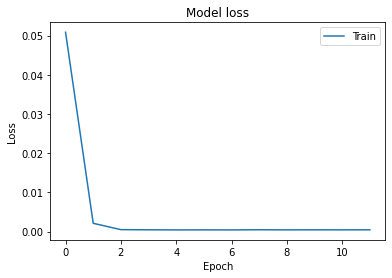

8/8 [==============================] - 0s 3ms/step
Mean squared error:  0.7036695824868968
Root mean squared error:  0.8388501549662472
Mean absolute error:  0.5976712985649816
R2 score:  0.1561951515688027


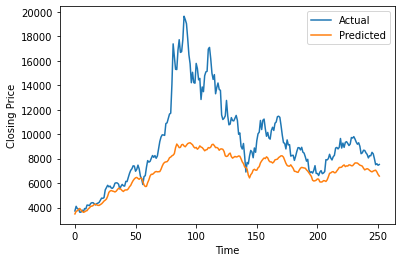

In [20]:
model = Sequential()
model.add(LSTM(50, input_shape=(window_size, 1)))
model.add(Dense(1))
optimizer = keras.optimizers.Adam()
model.compile(loss='mean_squared_error', optimizer= optimizer)

history = model.fit(x_train, y_train, epochs=250, batch_size=8,callbacks=[early_stop_train])
plot_history(history)
model_evaluation(model,x_test,y_test)

Epoch 1/250
128/128 [==============================] - 3s 4ms/step - loss: 0.0326
Epoch 2/250
128/128 [==============================] - 1s 4ms/step - loss: 0.0024
Epoch 3/250
128/128 [==============================] - 1s 4ms/step - loss: 0.0014
Epoch 4/250
128/128 [==============================] - 1s 4ms/step - loss: 0.0014
Epoch 5/250
128/128 [==============================] - 1s 4ms/step - loss: 0.0014
Epoch 6/250
128/128 [==============================] - 1s 5ms/step - loss: 0.0012
Epoch 7/250
128/128 [==============================] - 1s 6ms/step - loss: 0.0012
Epoch 8/250
128/128 [==============================] - 1s 6ms/step - loss: 0.0011
Epoch 9/250
128/128 [==============================] - 1s 5ms/step - loss: 0.0012
Epoch 10/250
128/128 [==============================] - 1s 5ms/step - loss: 9.8469e-04
Epoch 11/250
128/128 [==============================] - 1s 4ms/step - loss: 0.0010
Epoch 12/250
128/128 [==============================] - 0s 3ms/step - loss: 9.8493e-04
Epoch

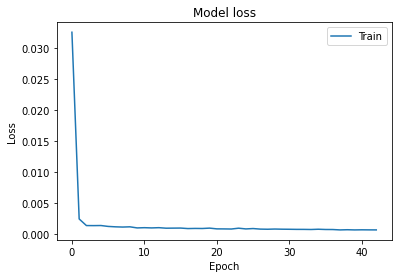

8/8 [==============================] - 1s 4ms/step
Mean squared error:  0.19107239902838352
Root mean squared error:  0.4371182895148446
Mean absolute error:  0.2995799817087576
R2 score:  0.7708756770020926


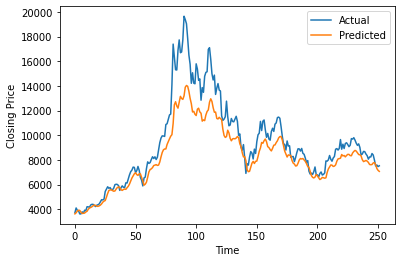

In [21]:
#modelo com dropout
model = Sequential()
model.add(LSTM(50, input_shape=(window_size, 1)))
model.add(Dropout(0.1))
model.add(Dense(1))
optimizer = keras.optimizers.Adam()
model.compile(loss='mean_squared_error', optimizer= optimizer)

history = model.fit(x_train, y_train, epochs=250, batch_size=8,callbacks=[early_stop_train])
plot_history(history)
model_evaluation(model,x_test,y_test)

Epoch 1/250
128/128 [==============================] - 3s 4ms/step - loss: 0.1393
Epoch 2/250
128/128 [==============================] - 1s 4ms/step - loss: 0.0349
Epoch 3/250
128/128 [==============================] - 1s 4ms/step - loss: 0.0199
Epoch 4/250
128/128 [==============================] - 1s 5ms/step - loss: 0.0141
Epoch 5/250
128/128 [==============================] - 1s 6ms/step - loss: 0.0108
Epoch 6/250
128/128 [==============================] - 1s 6ms/step - loss: 0.0087
Epoch 7/250
128/128 [==============================] - 1s 6ms/step - loss: 0.0074
Epoch 8/250
128/128 [==============================] - 1s 4ms/step - loss: 0.0063
Epoch 9/250
128/128 [==============================] - 1s 4ms/step - loss: 0.0056
Epoch 10/250
128/128 [==============================] - 1s 4ms/step - loss: 0.0053
Epoch 11/250
128/128 [==============================] - 1s 4ms/step - loss: 0.0047
Epoch 12/250
128/128 [==============================] - 0s 4ms/step - loss: 0.0049
Epoch 13/250


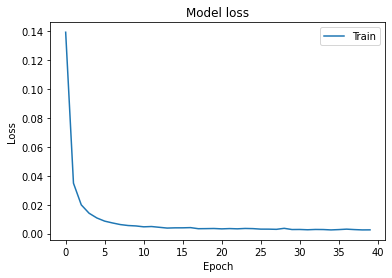

8/8 [==============================] - 0s 3ms/step
Mean squared error:  0.1658128441331397
Root mean squared error:  0.40720123297104555
Mean absolute error:  0.26593540583878256
R2 score:  0.8011656531788269


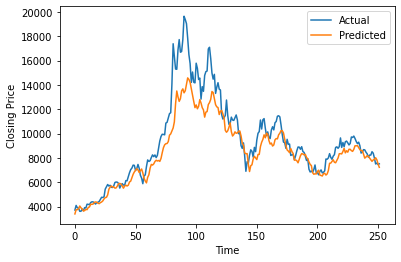

In [22]:
#modelo com dropout e regularização
model = Sequential()
model.add(LSTM(50, input_shape=(window_size, 1),kernel_regularizer= keras.regularizers.l1(0.01)))
model.add(Dropout(0.1))
model.add(Dense(1))
optimizer = keras.optimizers.Adam()
model.compile(loss='mean_squared_error', optimizer= optimizer)

history = model.fit(x_train, y_train, epochs=250, batch_size=8,callbacks=[early_stop_train])
plot_history(history)
model_evaluation(model,x_test,y_test)



# Modelo 2, window_size = 7

In [23]:
#Criando datasets usando uma janela com 3 pontos
window_size = 7
x, y = window_data(scaled_data, window_size)
x_train, x_test = np.array(x[:1018]),np.array(x[1018:])
y_train, y_test = np.array(y[:1018]), np.array(y[1018:])

print("X_train size: {}".format(x_train.shape))
print("y_train size: {}".format(y_train.shape))
print("X_test size: {}".format(x_test.shape))
print("y_test size: {}".format(y_test.shape))

X_train size: (1018, 7, 1)
y_train size: (1018, 1)
X_test size: (248, 7, 1)
y_test size: (248, 1)


Epoch 1/250
128/128 [==============================] - 3s 10ms/step - loss: 0.0089
Epoch 2/250
128/128 [==============================] - 1s 10ms/step - loss: 6.7621e-04
Epoch 3/250
128/128 [==============================] - 1s 10ms/step - loss: 6.5331e-04
Epoch 4/250
128/128 [==============================] - 1s 10ms/step - loss: 6.5194e-04
Epoch 5/250
128/128 [==============================] - 1s 10ms/step - loss: 6.3607e-04
Epoch 6/250
128/128 [==============================] - 2s 15ms/step - loss: 6.1157e-04
Epoch 7/250
128/128 [==============================] - 2s 12ms/step - loss: 5.8960e-04
Epoch 8/250
128/128 [==============================] - 1s 10ms/step - loss: 5.7767e-04
Epoch 9/250
128/128 [==============================] - 1s 10ms/step - loss: 5.9770e-04
Epoch 10/250
128/128 [==============================] - 1s 10ms/step - loss: 5.2945e-04
Epoch 11/250
128/128 [==============================] - 1s 10ms/step - loss: 5.4998e-04
Epoch 12/250
128/128 [=======================

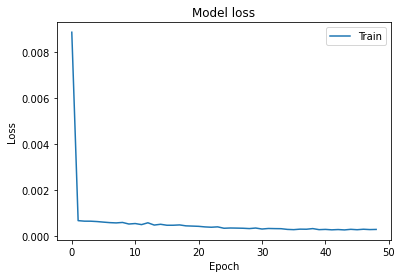

8/8 [==============================] - 0s 6ms/step
Mean squared error:  0.05131775036689692
Root mean squared error:  0.22653421456128192
Mean absolute error:  0.1421749412809646
R2 score:  0.936990102846913


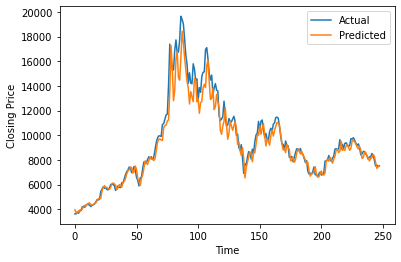

In [24]:
model = Sequential()
model.add(LSTM(150, input_shape=(window_size, 1)))
model.add(Dense(1))
optimizer = keras.optimizers.Adam()
model.compile(loss='mean_squared_error', optimizer= optimizer)

history = model.fit(x_train, y_train, epochs=250, batch_size=8,callbacks=[early_stop_train])
plot_history(history)
model_evaluation(model,x_test,y_test)

Epoch 1/250
128/128 [==============================] - 4s 10ms/step - loss: 0.0077
Epoch 2/250
128/128 [==============================] - 1s 10ms/step - loss: 0.0011
Epoch 3/250
128/128 [==============================] - 1s 10ms/step - loss: 0.0010
Epoch 4/250
128/128 [==============================] - 1s 10ms/step - loss: 0.0010
Epoch 5/250
128/128 [==============================] - 1s 10ms/step - loss: 9.4004e-04
Epoch 6/250
128/128 [==============================] - 1s 10ms/step - loss: 9.4821e-04
Epoch 7/250
128/128 [==============================] - 2s 13ms/step - loss: 9.2832e-04
Epoch 8/250
128/128 [==============================] - 2s 15ms/step - loss: 8.3373e-04
Epoch 9/250
128/128 [==============================] - 3s 20ms/step - loss: 8.3999e-04
Epoch 10/250
128/128 [==============================] - 2s 14ms/step - loss: 8.0823e-04
Epoch 11/250
128/128 [==============================] - 2s 14ms/step - loss: 8.4345e-04
Epoch 12/250
128/128 [==============================] - 2

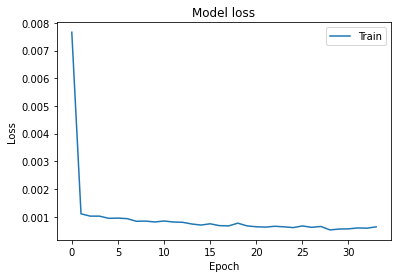

8/8 [==============================] - 1s 6ms/step
Mean squared error:  0.04073893708806497
Root mean squared error:  0.20183888893883897
Mean absolute error:  0.14091223536325917
R2 score:  0.9499791745021445


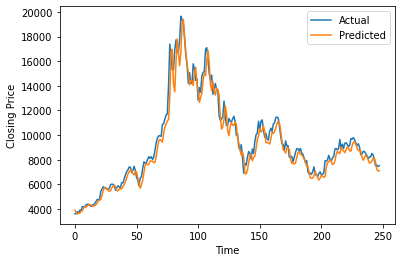

In [25]:
#modelo com dropout
model = Sequential()
model.add(LSTM(150, input_shape=(window_size, 1)))
model.add(Dropout(0.1))
model.add(Dense(1))
optimizer = keras.optimizers.Adam()
model.compile(loss='mean_squared_error', optimizer= optimizer)

history = model.fit(x_train, y_train, epochs=250, batch_size=8,callbacks=[early_stop_train])
plot_history(history)
model_evaluation(model,x_test,y_test)

In [34]:
early_stop_train2 = EarlyStopping(monitor = 'loss',patience = 10)

Epoch 1/250
128/128 [==============================] - 4s 11ms/step - loss: 0.1131
Epoch 2/250
128/128 [==============================] - 1s 10ms/step - loss: 0.0111
Epoch 3/250
128/128 [==============================] - 1s 11ms/step - loss: 0.0077
Epoch 4/250
128/128 [==============================] - 1s 11ms/step - loss: 0.0063
Epoch 5/250
128/128 [==============================] - 1s 10ms/step - loss: 0.0064
Epoch 6/250
128/128 [==============================] - 1s 10ms/step - loss: 0.0051
Epoch 7/250
128/128 [==============================] - 1s 10ms/step - loss: 0.0053
Epoch 8/250
128/128 [==============================] - 2s 13ms/step - loss: 0.0054
Epoch 9/250
128/128 [==============================] - 2s 16ms/step - loss: 0.0046
Epoch 10/250
128/128 [==============================] - 1s 11ms/step - loss: 0.0041
Epoch 11/250
128/128 [==============================] - 1s 10ms/step - loss: 0.0046
Epoch 12/250
128/128 [==============================] - 1s 10ms/step - loss: 0.0042
E

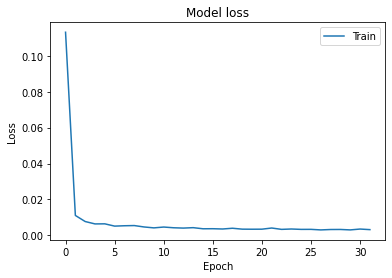

8/8 [==============================] - 0s 6ms/step
Mean squared error:  0.4603309553801751
Root mean squared error:  0.6784769379869703
Mean absolute error:  0.49607313546540804
R2 score:  0.4347880421976291


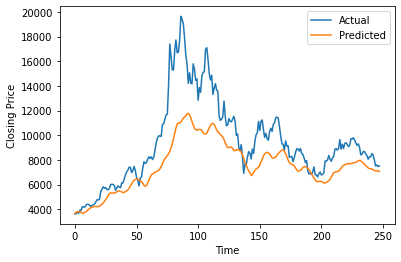

In [26]:
#modelo com dropout e regularização
model = Sequential()
model.add(LSTM(150, input_shape=(window_size, 1),kernel_regularizer= keras.regularizers.l1(0.01)))
model.add(Dropout(0.1))
model.add(Dense(1))
optimizer = keras.optimizers.Adam()
model.compile(loss='mean_squared_error', optimizer= optimizer)

history = model.fit(x_train, y_train, epochs=250, batch_size=8,callbacks=[early_stop_train])
plot_history(history)
model_evaluation(model,x_test,y_test)

# Modelo 2, window_size = 5

In [27]:
#Criando datasets usando uma janela com 5 pontos
window_size = 5
x, y = window_data(scaled_data, window_size)
x_train, x_test = np.array(x[:1018]),np.array(x[1018:])
y_train, y_test = np.array(y[:1018]), np.array(y[1018:])

print("X_train size: {}".format(x_train.shape))
print("y_train size: {}".format(y_train.shape))
print("X_test size: {}".format(x_test.shape))
print("y_test size: {}".format(y_test.shape))

X_train size: (1018, 5, 1)
y_train size: (1018, 1)
X_test size: (250, 5, 1)
y_test size: (250, 1)


Epoch 1/250
128/128 [==============================] - 4s 11ms/step - loss: 0.0121
Epoch 2/250
128/128 [==============================] - 1s 8ms/step - loss: 5.9077e-04
Epoch 3/250
128/128 [==============================] - 1s 8ms/step - loss: 6.0080e-04
Epoch 4/250
128/128 [==============================] - 1s 8ms/step - loss: 6.0240e-04
Epoch 5/250
128/128 [==============================] - 1s 8ms/step - loss: 6.1221e-04
Epoch 6/250
128/128 [==============================] - 1s 8ms/step - loss: 5.9034e-04
Epoch 7/250
128/128 [==============================] - 1s 8ms/step - loss: 5.6169e-04
Epoch 8/250
128/128 [==============================] - 1s 8ms/step - loss: 5.5071e-04
Epoch 9/250
128/128 [==============================] - 1s 8ms/step - loss: 5.8501e-04
Epoch 10/250
128/128 [==============================] - 1s 8ms/step - loss: 5.5231e-04
Epoch 11/250
128/128 [==============================] - 2s 14ms/step - loss: 5.8931e-04
Epoch 12/250
128/128 [==============================] 

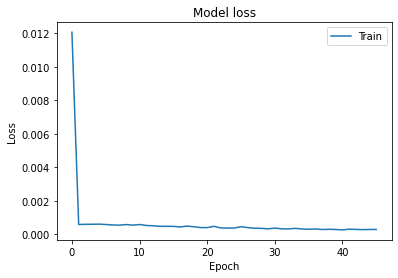

8/8 [==============================] - 0s 5ms/step
Mean squared error:  0.06118786995099279
Root mean squared error:  0.24736181991364956
Mean absolute error:  0.1905825131609568
R2 score:  0.9257829781250865


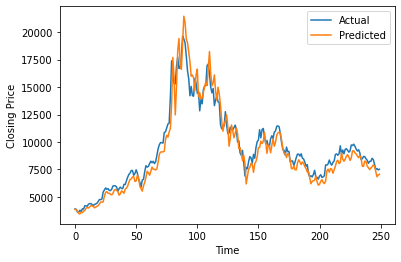

In [28]:
model = Sequential()
model.add(LSTM(150, input_shape=(window_size, 1)))
model.add(Dense(1))
optimizer = keras.optimizers.Adam()
model.compile(loss='mean_squared_error', optimizer= optimizer)

history = model.fit(x_train, y_train, epochs=250, batch_size=8,callbacks=[early_stop_train])
plot_history(history)
model_evaluation(model,x_test,y_test)

Epoch 1/250
128/128 [==============================] - 10s 17ms/step - loss: 0.0131
Epoch 2/250
128/128 [==============================] - 2s 16ms/step - loss: 9.9911e-04
Epoch 3/250
128/128 [==============================] - 2s 18ms/step - loss: 9.4784e-04
Epoch 4/250
128/128 [==============================] - 3s 20ms/step - loss: 9.7130e-04
Epoch 5/250
128/128 [==============================] - 2s 17ms/step - loss: 9.3396e-04
Epoch 6/250
128/128 [==============================] - 2s 19ms/step - loss: 8.6601e-04
Epoch 7/250
128/128 [==============================] - 3s 20ms/step - loss: 8.0648e-04
Epoch 8/250
128/128 [==============================] - 2s 17ms/step - loss: 8.6355e-04
Epoch 9/250
128/128 [==============================] - 2s 18ms/step - loss: 8.1271e-04
Epoch 10/250
128/128 [==============================] - 2s 16ms/step - loss: 8.1818e-04
Epoch 11/250
128/128 [==============================] - 1s 12ms/step - loss: 7.6862e-04
Epoch 12/250
128/128 [======================

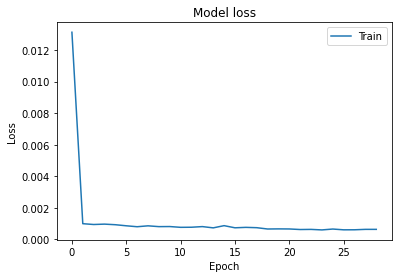

8/8 [==============================] - 1s 7ms/step
Mean squared error:  0.46726560122728583
Root mean squared error:  0.6835682857091059
Mean absolute error:  0.4839676712878336
R2 score:  0.4332363362958117


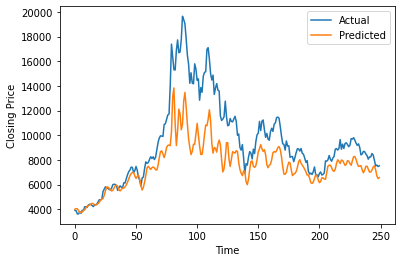

In [29]:
#modelo com dropout
model = Sequential()
model.add(LSTM(150, input_shape=(window_size, 1)))
model.add(Dropout(0.1))
model.add(Dense(1))
optimizer = keras.optimizers.Adam()
model.compile(loss='mean_squared_error', optimizer= optimizer)

history = model.fit(x_train, y_train, epochs=250, batch_size=8,callbacks=[early_stop_train])
plot_history(history)
model_evaluation(model,x_test,y_test)

Epoch 1/250
128/128 [==============================] - 4s 9ms/step - loss: 0.1216
Epoch 2/250
128/128 [==============================] - 1s 8ms/step - loss: 0.0140
Epoch 3/250
128/128 [==============================] - 1s 9ms/step - loss: 0.0079
Epoch 4/250
128/128 [==============================] - 1s 8ms/step - loss: 0.0066
Epoch 5/250
128/128 [==============================] - 1s 8ms/step - loss: 0.0057
Epoch 6/250
128/128 [==============================] - 1s 8ms/step - loss: 0.0065
Epoch 7/250
128/128 [==============================] - 1s 8ms/step - loss: 0.0054
Epoch 8/250
128/128 [==============================] - 1s 8ms/step - loss: 0.0046
Epoch 9/250
128/128 [==============================] - 1s 11ms/step - loss: 0.0047
Epoch 10/250
128/128 [==============================] - 2s 13ms/step - loss: 0.0043
Epoch 11/250
128/128 [==============================] - 1s 9ms/step - loss: 0.0048
Epoch 12/250
128/128 [==============================] - 1s 8ms/step - loss: 0.0040
Epoch 13/25

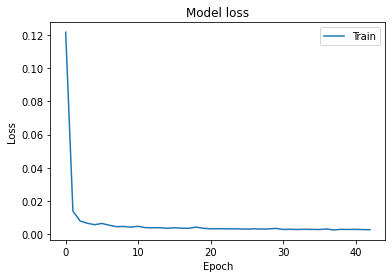

8/8 [==============================] - 1s 4ms/step
Mean squared error:  0.29662402278711214
Root mean squared error:  0.544632006759713
Mean absolute error:  0.37760678905506473
R2 score:  0.6402137939194801


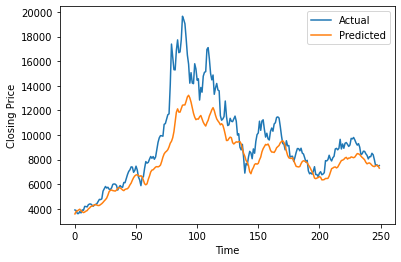

In [30]:
#modelo com dropout e regularização
model = Sequential()
model.add(LSTM(150, input_shape=(window_size, 1),kernel_regularizer= keras.regularizers.l1(0.01)))
model.add(Dropout(0.1))
model.add(Dense(1))
optimizer = keras.optimizers.Adam()
model.compile(loss='mean_squared_error', optimizer= optimizer)

history = model.fit(x_train, y_train, epochs=250, batch_size=8,callbacks=[early_stop_train])
plot_history(history)
model_evaluation(model,x_test,y_test)

# Modelo 2, window_size=3

In [31]:
#Criando datasets usando uma janela com 3 pontos
window_size = 3
x, y = window_data(scaled_data, window_size)
x_train, x_test = np.array(x[:1018]),np.array(x[1018:])
y_train, y_test = np.array(y[:1018]), np.array(y[1018:])

print("X_train size: {}".format(x_train.shape))
print("y_train size: {}".format(y_train.shape))
print("X_test size: {}".format(x_test.shape))
print("y_test size: {}".format(y_test.shape))

X_train size: (1018, 3, 1)
y_train size: (1018, 1)
X_test size: (252, 3, 1)
y_test size: (252, 1)


Epoch 1/250
128/128 [==============================] - 3s 6ms/step - loss: 0.0200
Epoch 2/250
128/128 [==============================] - 1s 6ms/step - loss: 4.3480e-04
Epoch 3/250
128/128 [==============================] - 1s 6ms/step - loss: 4.4552e-04
Epoch 4/250
128/128 [==============================] - 1s 6ms/step - loss: 4.3499e-04
Epoch 5/250
128/128 [==============================] - 1s 6ms/step - loss: 4.4244e-04
Epoch 6/250
128/128 [==============================] - 1s 6ms/step - loss: 4.3092e-04
Epoch 7/250
128/128 [==============================] - 1s 6ms/step - loss: 4.3086e-04
Epoch 8/250
128/128 [==============================] - 1s 6ms/step - loss: 4.7080e-04
Epoch 9/250
128/128 [==============================] - 1s 10ms/step - loss: 4.3169e-04
Epoch 10/250
128/128 [==============================] - 1s 9ms/step - loss: 4.3429e-04
Epoch 11/250
128/128 [==============================] - 1s 7ms/step - loss: 4.4866e-04
Epoch 12/250
128/128 [==============================] -

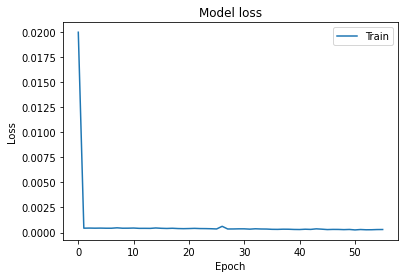

8/8 [==============================] - 1s 5ms/step
Mean squared error:  0.15773882277744797
Root mean squared error:  0.3971634711015704
Mean absolute error:  0.27220327338165573
R2 score:  0.8108476097900417


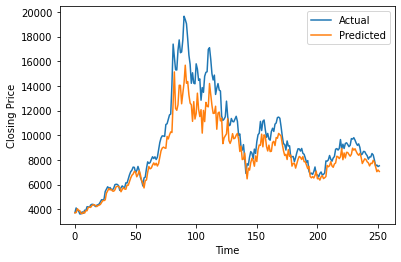

In [41]:
model = Sequential()
model.add(LSTM(150, input_shape=(window_size, 1)))
model.add(Dense(1))
optimizer = keras.optimizers.Adam()
model.compile(loss='mean_squared_error', optimizer= optimizer)

history = model.fit(x_train, y_train, epochs=250, batch_size=8,callbacks=[early_stop_train])
plot_history(history)
model_evaluation(model,x_test,y_test)

Epoch 1/250
128/128 [==============================] - 4s 6ms/step - loss: 0.1325
Epoch 2/250
128/128 [==============================] - 1s 6ms/step - loss: 0.0202
Epoch 3/250
128/128 [==============================] - 1s 6ms/step - loss: 0.0106
Epoch 4/250
128/128 [==============================] - 1s 6ms/step - loss: 0.0078
Epoch 5/250
128/128 [==============================] - 1s 6ms/step - loss: 0.0058
Epoch 6/250
128/128 [==============================] - 1s 6ms/step - loss: 0.0053
Epoch 7/250
128/128 [==============================] - 1s 6ms/step - loss: 0.0045
Epoch 8/250
128/128 [==============================] - 1s 6ms/step - loss: 0.0043
Epoch 9/250
128/128 [==============================] - 1s 6ms/step - loss: 0.0046
Epoch 10/250
128/128 [==============================] - 1s 6ms/step - loss: 0.0041
Epoch 11/250
128/128 [==============================] - 1s 6ms/step - loss: 0.0036
Epoch 12/250
128/128 [==============================] - 1s 6ms/step - loss: 0.0036
Epoch 13/250


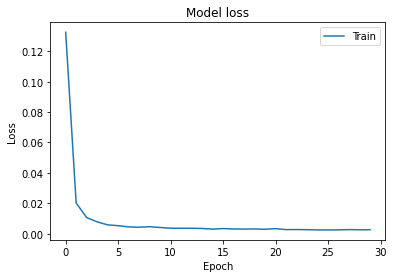

8/8 [==============================] - 0s 4ms/step
Mean squared error:  0.15429826312427602
Root mean squared error:  0.39280817598959933
Mean absolute error:  0.2575932924762921
R2 score:  0.8149733542998483


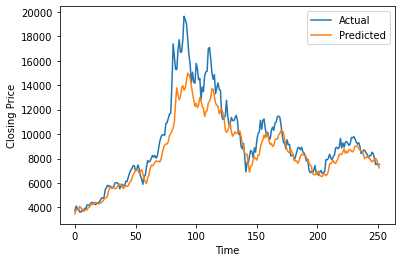

In [42]:
#modelo com regularização
model = Sequential()
model.add(LSTM(150, input_shape=(window_size, 1),kernel_regularizer= keras.regularizers.l1(0.01)))
model.add(Dense(1))
optimizer = keras.optimizers.Adam()
model.compile(loss='mean_squared_error', optimizer= optimizer)

history = model.fit(x_train, y_train, epochs=250, batch_size=8,callbacks=[early_stop_train])
plot_history(history)
model_evaluation(model,x_test,y_test)

Epoch 1/250
128/128 [==============================] - 3s 6ms/step - loss: 0.0195
Epoch 2/250
128/128 [==============================] - 1s 6ms/step - loss: 7.9240e-04
Epoch 3/250
128/128 [==============================] - 1s 6ms/step - loss: 8.0439e-04
Epoch 4/250
128/128 [==============================] - 1s 6ms/step - loss: 7.4975e-04
Epoch 5/250
128/128 [==============================] - 1s 6ms/step - loss: 7.5521e-04
Epoch 6/250
128/128 [==============================] - 1s 6ms/step - loss: 7.1668e-04
Epoch 7/250
128/128 [==============================] - 1s 6ms/step - loss: 7.8410e-04
Epoch 8/250
128/128 [==============================] - 1s 6ms/step - loss: 6.8027e-04
Epoch 9/250
128/128 [==============================] - 1s 8ms/step - loss: 7.1250e-04
Epoch 10/250
128/128 [==============================] - 1s 10ms/step - loss: 7.3503e-04
Epoch 11/250
128/128 [==============================] - 1s 9ms/step - loss: 6.5760e-04
Epoch 12/250
128/128 [==============================] -

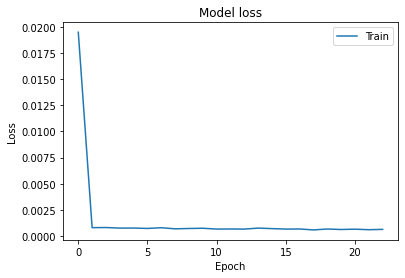

8/8 [==============================] - 1s 5ms/step
Mean squared error:  0.13362033580347638
Root mean squared error:  0.36554115473291976
Mean absolute error:  0.22983282608729752
R2 score:  0.8397692752307115


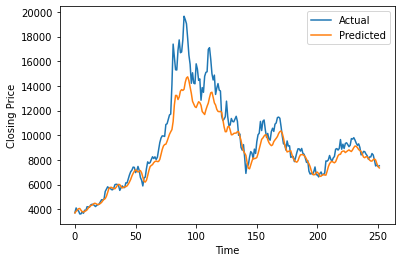

In [32]:
#modelo com dropout
model = Sequential()
model.add(LSTM(150, input_shape=(window_size, 1)))
model.add(Dropout(0.1))
model.add(Dense(1))
optimizer = keras.optimizers.Adam()
model.compile(loss='mean_squared_error', optimizer= optimizer)

history = model.fit(x_train, y_train, epochs=250, batch_size=8,callbacks=[early_stop_train])
plot_history(history)
model_evaluation(model,x_test,y_test)

Epoch 1/250
128/128 [==============================] - 3s 6ms/step - loss: 0.1321
Epoch 2/250
128/128 [==============================] - 1s 6ms/step - loss: 0.0212
Epoch 3/250
128/128 [==============================] - 1s 6ms/step - loss: 0.0114
Epoch 4/250
128/128 [==============================] - 1s 6ms/step - loss: 0.0085
Epoch 5/250
128/128 [==============================] - 1s 6ms/step - loss: 0.0069
Epoch 6/250
128/128 [==============================] - 1s 6ms/step - loss: 0.0062
Epoch 7/250
128/128 [==============================] - 1s 6ms/step - loss: 0.0055
Epoch 8/250
128/128 [==============================] - 1s 6ms/step - loss: 0.0050
Epoch 9/250
128/128 [==============================] - 1s 6ms/step - loss: 0.0054
Epoch 10/250
128/128 [==============================] - 1s 6ms/step - loss: 0.0042
Epoch 11/250
128/128 [==============================] - 1s 9ms/step - loss: 0.0043
Epoch 12/250
128/128 [==============================] - 1s 9ms/step - loss: 0.0043
Epoch 13/250


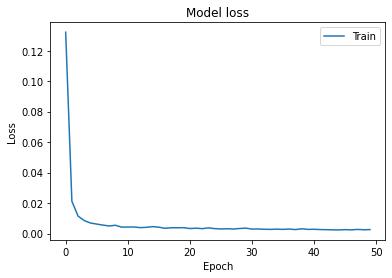

8/8 [==============================] - 0s 4ms/step
Mean squared error:  0.12024447815772216
Root mean squared error:  0.3467628557930076
Mean absolute error:  0.22162503153756774
R2 score:  0.8558089248252329


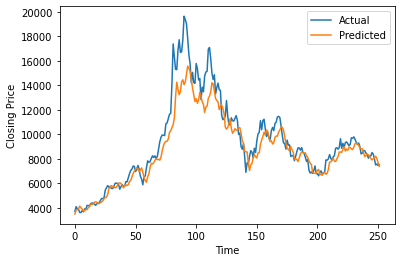

In [33]:
#modelo com dropout e regularização
model = Sequential()
model.add(LSTM(150, input_shape=(window_size, 1),kernel_regularizer= keras.regularizers.l1(0.01)))
model.add(Dropout(0.1))
model.add(Dense(1))
optimizer = keras.optimizers.Adam()
model.compile(loss='mean_squared_error', optimizer= optimizer)

history = model.fit(x_train, y_train, epochs=250, batch_size=8,callbacks=[early_stop_train])
plot_history(history)
model_evaluation(model,x_test,y_test)

# Modelo 3, window_size = 7

In [44]:
#Criando datasets usando uma janela com 7 pontos
window_size = 7
x, y = window_data(scaled_data, window_size)
x_train, x_test = np.array(x[:1018]),np.array(x[1018:])
y_train, y_test = np.array(y[:1018]), np.array(y[1018:])

print("X_train size: {}".format(x_train.shape))
print("y_train size: {}".format(y_train.shape))
print("X_test size: {}".format(x_test.shape))
print("y_test size: {}".format(y_test.shape))

X_train size: (1018, 7, 1)
y_train size: (1018, 1)
X_test size: (248, 7, 1)
y_test size: (248, 1)


Epoch 1/250
128/128 [==============================] - 7s 23ms/step - loss: 0.0088
Epoch 2/250
128/128 [==============================] - 2s 15ms/step - loss: 7.8970e-04
Epoch 3/250
128/128 [==============================] - 2s 15ms/step - loss: 7.9451e-04
Epoch 4/250
128/128 [==============================] - 2s 15ms/step - loss: 7.9539e-04
Epoch 5/250
128/128 [==============================] - 2s 15ms/step - loss: 7.8451e-04
Epoch 6/250
128/128 [==============================] - 2s 16ms/step - loss: 8.7468e-04
Epoch 7/250
128/128 [==============================] - 3s 23ms/step - loss: 7.7301e-04
Epoch 8/250
128/128 [==============================] - 2s 15ms/step - loss: 7.3175e-04
Epoch 9/250
128/128 [==============================] - 2s 15ms/step - loss: 6.8064e-04
Epoch 10/250
128/128 [==============================] - 2s 15ms/step - loss: 8.5845e-04
Epoch 11/250
128/128 [==============================] - 2s 16ms/step - loss: 6.5353e-04
Epoch 12/250
128/128 [=======================

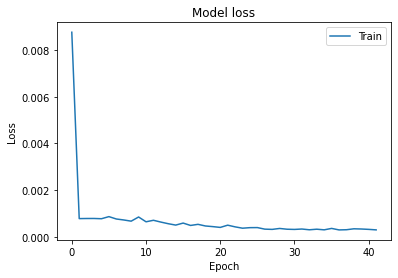

8/8 [==============================] - 1s 7ms/step
Mean squared error:  0.17507958407190688
Root mean squared error:  0.41842512361461626
Mean absolute error:  0.29422074151332506
R2 score:  0.7850305886929084


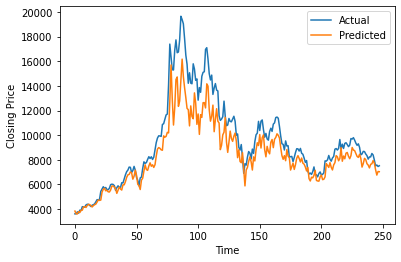

In [45]:
model = Sequential()
model.add(LSTM(150, input_shape=(window_size, 1), return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
optimizer = keras.optimizers.Adam()
model.compile(loss='mean_squared_error', optimizer=optimizer)

history = model.fit(x_train, y_train, epochs=250, batch_size=8, callbacks=[early_stop_train])
plot_history(history)
model_evaluation(model, x_test, y_test)

Epoch 1/250
128/128 [==============================] - 7s 22ms/step - loss: 0.0097
Epoch 2/250
128/128 [==============================] - 2s 17ms/step - loss: 0.0017
Epoch 3/250
128/128 [==============================] - 2s 15ms/step - loss: 0.0018
Epoch 4/250
128/128 [==============================] - 2s 15ms/step - loss: 0.0017
Epoch 5/250
128/128 [==============================] - 2s 16ms/step - loss: 0.0016
Epoch 6/250
128/128 [==============================] - 2s 15ms/step - loss: 0.0015
Epoch 7/250
128/128 [==============================] - 3s 23ms/step - loss: 0.0016
Epoch 8/250
128/128 [==============================] - 2s 16ms/step - loss: 0.0016
Epoch 9/250
128/128 [==============================] - 2s 15ms/step - loss: 0.0015
Epoch 10/250
128/128 [==============================] - 2s 15ms/step - loss: 0.0013
Epoch 11/250
128/128 [==============================] - 3s 20ms/step - loss: 0.0014
Epoch 12/250
128/128 [==============================] - 2s 15ms/step - loss: 0.0015
E

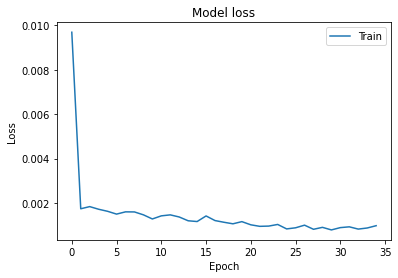

8/8 [==============================] - 1s 7ms/step
Mean squared error:  0.08195968178841045
Root mean squared error:  0.28628601395878644
Mean absolute error:  0.17099989432500282
R2 score:  0.8993667671855164


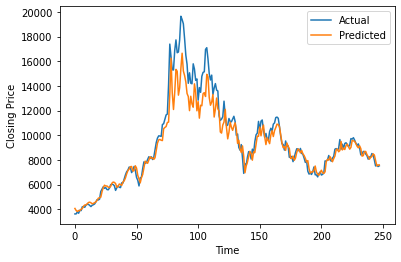

In [46]:
model = Sequential()
model.add(LSTM(150, input_shape=(window_size, 1), return_sequences=True))
model.add(Dropout(0.1))
model.add(LSTM(50))
model.add(Dropout(0.1))
model.add(Dense(1))
optimizer = keras.optimizers.Adam()
model.compile(loss='mean_squared_error', optimizer=optimizer)

history = model.fit(x_train, y_train, epochs=250, batch_size=8, callbacks=[early_stop_train])
plot_history(history)
model_evaluation(model, x_test, y_test)

Epoch 1/250
128/128 [==============================] - 6s 16ms/step - loss: 7.1041
Epoch 2/250
128/128 [==============================] - 3s 24ms/step - loss: 0.0984
Epoch 3/250
128/128 [==============================] - 2s 16ms/step - loss: 0.0704
Epoch 4/250
128/128 [==============================] - 2s 15ms/step - loss: 0.0607
Epoch 5/250
128/128 [==============================] - 2s 16ms/step - loss: 0.0549
Epoch 6/250
128/128 [==============================] - 2s 16ms/step - loss: 0.0520
Epoch 7/250
128/128 [==============================] - 2s 18ms/step - loss: 0.0490
Epoch 8/250
128/128 [==============================] - 3s 22ms/step - loss: 0.0482
Epoch 9/250
128/128 [==============================] - 2s 16ms/step - loss: 0.0453
Epoch 10/250
128/128 [==============================] - 2s 15ms/step - loss: 0.0430
Epoch 11/250
128/128 [==============================] - 2s 15ms/step - loss: 0.0433
Epoch 12/250
128/128 [==============================] - 2s 16ms/step - loss: 0.0443
E

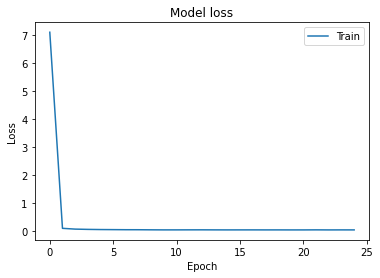

8/8 [==============================] - 1s 7ms/step
Mean squared error:  1.1398274784406013
Root mean squared error:  1.0676270315239313
Mean absolute error:  0.8419203990869827
R2 score:  -0.39952378417455736


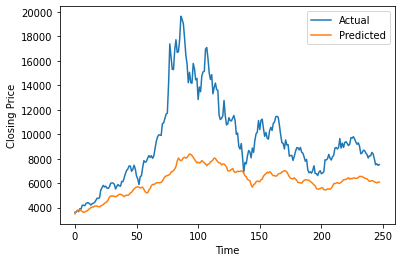

In [47]:
#modelo com dropout e regularização
model = Sequential()
model.add(LSTM(150, input_shape=(window_size, 1),kernel_regularizer= keras.regularizers.l1(0.01), return_sequences=True))
model.add(Dropout(0.1))
model.add(LSTM(50,kernel_regularizer= keras.regularizers.l1(0.01)))
model.add(Dropout(0.1))



model.add(Dense(1))
optimizer = keras.optimizers.Adam()
model.compile(loss='mean_squared_error', optimizer= optimizer)

history = model.fit(x_train, y_train, epochs=250, batch_size=8,callbacks=[early_stop_train])
plot_history(history)
model_evaluation(model,x_test,y_test)

# Modelo 3, window_size = 3

In [48]:
#Criando datasets usando uma janela com 3 pontos
window_size = 3
x, y = window_data(scaled_data, window_size)
x_train, x_test = np.array(x[:1018]),np.array(x[1018:])
y_train, y_test = np.array(y[:1018]), np.array(y[1018:])

print("X_train size: {}".format(x_train.shape))
print("y_train size: {}".format(y_train.shape))
print("X_test size: {}".format(x_test.shape))
print("y_test size: {}".format(y_test.shape))

X_train size: (1018, 3, 1)
y_train size: (1018, 1)
X_test size: (252, 3, 1)
y_test size: (252, 1)


Epoch 1/250
128/128 [==============================] - 6s 9ms/step - loss: 0.0184
Epoch 2/250
128/128 [==============================] - 1s 9ms/step - loss: 4.6709e-04
Epoch 3/250
128/128 [==============================] - 1s 9ms/step - loss: 4.6100e-04
Epoch 4/250
128/128 [==============================] - 1s 9ms/step - loss: 4.6920e-04
Epoch 5/250
128/128 [==============================] - 2s 13ms/step - loss: 4.6125e-04
Epoch 6/250
128/128 [==============================] - 2s 13ms/step - loss: 5.0286e-04
Epoch 7/250
128/128 [==============================] - 1s 9ms/step - loss: 4.7637e-04
Epoch 8/250
128/128 [==============================] - 1s 9ms/step - loss: 5.2889e-04


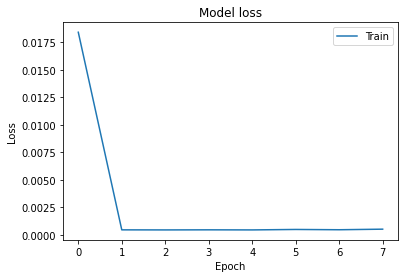

8/8 [==============================] - 1s 5ms/step
Mean squared error:  0.4765335108228852
Root mean squared error:  0.6903140668006739
Mean absolute error:  0.4684938108677038
R2 score:  0.42856520037260737


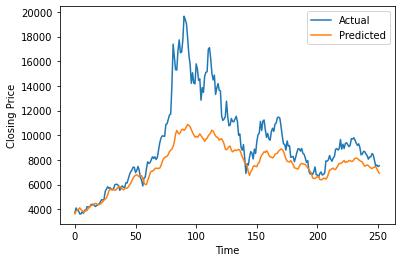

In [49]:
model = Sequential()
model.add(LSTM(150, input_shape=(window_size, 1), return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
optimizer = keras.optimizers.Adam()
model.compile(loss='mean_squared_error', optimizer=optimizer)

history = model.fit(x_train, y_train, epochs=250, batch_size=8, callbacks=[early_stop_train])
plot_history(history)
model_evaluation(model, x_test, y_test)

Epoch 1/250
128/128 [==============================] - 6s 10ms/step - loss: 0.0209
Epoch 2/250
128/128 [==============================] - 1s 10ms/step - loss: 0.0016
Epoch 3/250
128/128 [==============================] - 1s 9ms/step - loss: 0.0015
Epoch 4/250
128/128 [==============================] - 1s 10ms/step - loss: 0.0014
Epoch 5/250
128/128 [==============================] - 2s 14ms/step - loss: 0.0012
Epoch 6/250
128/128 [==============================] - 2s 13ms/step - loss: 0.0013
Epoch 7/250
128/128 [==============================] - 1s 10ms/step - loss: 0.0013
Epoch 8/250
128/128 [==============================] - 1s 10ms/step - loss: 0.0013
Epoch 9/250
128/128 [==============================] - 1s 10ms/step - loss: 0.0012
Epoch 10/250
128/128 [==============================] - 1s 10ms/step - loss: 0.0011
Epoch 11/250
128/128 [==============================] - 1s 10ms/step - loss: 0.0012
Epoch 12/250
128/128 [==============================] - 1s 9ms/step - loss: 0.0011
Epo

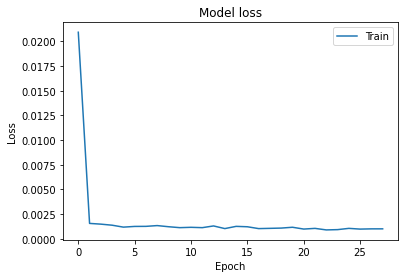

8/8 [==============================] - 1s 5ms/step
Mean squared error:  0.359317820405312
Root mean squared error:  0.5994312474381962
Mean absolute error:  0.4081813552887118
R2 score:  0.5691243070161012


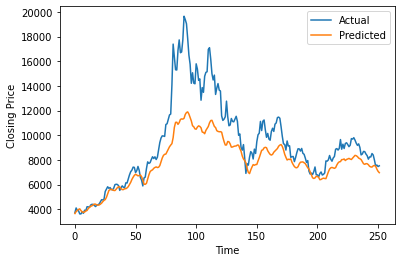

In [50]:
model = Sequential()
model.add(LSTM(150, input_shape=(window_size, 1), return_sequences=True))
model.add(Dropout(0.1))
model.add(LSTM(50))
model.add(Dropout(0.1))
model.add(Dense(1))
optimizer = keras.optimizers.Adam()
model.compile(loss='mean_squared_error', optimizer=optimizer)

history = model.fit(x_train, y_train, epochs=250, batch_size=8, callbacks=[early_stop_train])
plot_history(history)
model_evaluation(model, x_test, y_test)

Epoch 1/250
128/128 [==============================] - 5s 10ms/step - loss: 7.0564
Epoch 2/250
128/128 [==============================] - 1s 10ms/step - loss: 0.1133
Epoch 3/250
128/128 [==============================] - 2s 12ms/step - loss: 0.0988
Epoch 4/250
128/128 [==============================] - 2s 15ms/step - loss: 0.0989
Epoch 5/250
128/128 [==============================] - 1s 10ms/step - loss: 0.0979
Epoch 6/250
128/128 [==============================] - 1s 10ms/step - loss: 0.0986
Epoch 7/250
128/128 [==============================] - 1s 10ms/step - loss: 0.0980
Epoch 8/250
128/128 [==============================] - 1s 10ms/step - loss: 0.0980
Epoch 9/250
128/128 [==============================] - 1s 10ms/step - loss: 0.0986
Epoch 10/250
128/128 [==============================] - 1s 10ms/step - loss: 0.0978
Epoch 11/250
128/128 [==============================] - 1s 10ms/step - loss: 0.0987
Epoch 12/250
128/128 [==============================] - 1s 10ms/step - loss: 0.0981
E

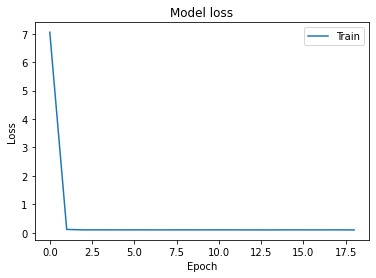

8/8 [==============================] - 1s 4ms/step
Mean squared error:  5.50324421224025
Root mean squared error:  2.345899446319098
Mean absolute error:  2.1608608275914767
R2 score:  -5.599211141083703


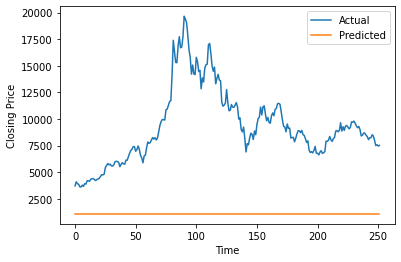

In [51]:
#modelo com dropout e regularização
model = Sequential()
model.add(LSTM(150, input_shape=(window_size, 1),kernel_regularizer= keras.regularizers.l1(0.01), return_sequences=True))
model.add(Dropout(0.1))
model.add(LSTM(50,kernel_regularizer= keras.regularizers.l1(0.01)))
model.add(Dropout(0.1))



model.add(Dense(1))
optimizer = keras.optimizers.Adam()
model.compile(loss='mean_squared_error', optimizer= optimizer)

history = model.fit(x_train, y_train, epochs=250, batch_size=8,callbacks=[early_stop_train])
plot_history(history)
model_evaluation(model,x_test,y_test)